In [168]:
%reload_ext autoreload
%autoreload 2
from functions import *

# Downloading Kaggle Dataset

In [ ]:
!pip install kagglehub

In [2]:
# Download to default location
path = kagglehub.dataset_download("prajitdatta/movielens-100k-dataset")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")

100%|██████████| 4.77M/4.77M [00:03<00:00, 1.26MB/s]

Extracting files...
Downloaded to: /Users/omar/.cache/kagglehub/datasets/prajitdatta/movielens-100k-dataset/versions/1
Files moved to ./data/
Cleaned up empty download directory



# Intial look on the data

In [48]:
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# user_id is for users / movie_id are for movies
# there are two more tables for each one

rating_df = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=rating_cols)
# ratings_base_df = pd.read_csv('./data/ml-100k/ua.base', sep='\t', names=rating_cols)
# ratings_test_df = pd.read_csv('./data/ml-100k/ua.test', sep='\t', names=rating_cols)
# print(ratings_base_df.head(20))
# print('=' * 50)
# print(ratings_test_df.head(20))

print("Number of ratings:", rating_df.shape[0])
print('=' * 50)
print(rating_df.head(20))

Number of ratings: 100000
    user_id  movie_id  rating  unix_timestamp
0       196       242       3       881250949
1       186       302       3       891717742
2        22       377       1       878887116
3       244        51       2       880606923
4       166       346       1       886397596
5       298       474       4       884182806
6       115       265       2       881171488
7       253       465       5       891628467
8       305       451       3       886324817
9         6        86       3       883603013
10       62       257       2       879372434
11      286      1014       5       879781125
12      200       222       5       876042340
13      210        40       3       891035994
14      224        29       3       888104457
15      303       785       3       879485318
16      122       387       5       879270459
17      194       274       2       879539794
18      291      1042       4       874834944
19      234      1184       2       892079237


In [40]:
users_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv('./data/ml-100k/u.user', sep='|', names=users_cols)

print('Number of users:', users_df.shape[0])
print('=' * 50)
print(users_df.head(20))

Number of users: 943
    user_id  age sex     occupation zip_code
0         1   24   M     technician    85711
1         2   53   F          other    94043
2         3   23   M         writer    32067
3         4   24   M     technician    43537
4         5   33   F          other    15213
5         6   42   M      executive    98101
6         7   57   M  administrator    91344
7         8   36   M  administrator    05201
8         9   29   M        student    01002
9        10   53   M         lawyer    90703
10       11   39   F          other    30329
11       12   28   F          other    06405
12       13   47   M       educator    29206
13       14   45   M      scientist    55106
14       15   49   F       educator    97301
15       16   21   M  entertainment    10309
16       17   30   M     programmer    06355
17       18   35   F          other    37212
18       19   40   M      librarian    02138
19       20   42   F      homemaker    95660


In [44]:
movies_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies_df = pd.read_csv('./data/ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

print("Number of items:",movies_df.shape[0])
print('='*50)
# print(items)
print(movies_df.head(20))

Number of items: 1682
    movie id                                        movie title release date  \
0          1                                   Toy Story (1995)  01-Jan-1995   
1          2                                   GoldenEye (1995)  01-Jan-1995   
2          3                                  Four Rooms (1995)  01-Jan-1995   
3          4                                  Get Shorty (1995)  01-Jan-1995   
4          5                                     Copycat (1995)  01-Jan-1995   
5          6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995   
6          7                              Twelve Monkeys (1995)  01-Jan-1995   
7          8                                        Babe (1995)  01-Jan-1995   
8          9                            Dead Man Walking (1995)  01-Jan-1995   
9         10                                 Richard III (1995)  22-Jan-1996   
10        11                               Seven (Se7en) (1995)  01-Jan-1995   
11        12      

In [42]:
# so we have 1682 movies, and 943 users, and a joined table (100k records) of rated movies from users

In [46]:
# df that maps each movie id with their titles
movies_ids_df = movies_df[['movie id', 'movie title']]
movies_ids_df.head(20)

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [104]:
# we can merge the movie id table with the rating table to get a table that have the avg movie ratings
merged_df = pd.merge(rating_df, movies_ids_df, left_on='movie_id', right_on='movie id')
print("Merged DataFrame shape:", merged_df.shape)
print('=' * 50)
print(merged_df.head(20))

Merged DataFrame shape: (100000, 6)
    user_id  movie_id  rating  unix_timestamp  movie id  \
0       196       242       3       881250949       242   
1       186       302       3       891717742       302   
2        22       377       1       878887116       377   
3       244        51       2       880606923        51   
4       166       346       1       886397596       346   
5       298       474       4       884182806       474   
6       115       265       2       881171488       265   
7       253       465       5       891628467       465   
8       305       451       3       886324817       451   
9         6        86       3       883603013        86   
10       62       257       2       879372434       257   
11      286      1014       5       879781125      1014   
12      200       222       5       876042340       222   
13      210        40       3       891035994        40   
14      224        29       3       888104457        29   
15      303       78

In [105]:
avg_ratings_df = merged_df.groupby('movie title')['rating'].mean().reset_index()
avg_ratings_df = avg_ratings_df.rename(columns={'rating': 'avg_rating'})


avg_ratings_df = avg_ratings_df.sort_values(by='avg_rating', ascending=False)
print("number of movies with ratings:", avg_ratings_df.shape[0]) # 1664 movies are rated from 1682 movies
print('=' * 50)
print("Average ratings for each movie:") 
print(avg_ratings_df.head(20))

number of movies with ratings: 1664
Average ratings for each movie:
                                            movie title  avg_rating
1472                     They Made Me a Criminal (1939)    5.000000
944          Marlene Dietrich: Shadow and Light (1996)     5.000000
1273               Saint of Fort Washington, The (1993)    5.000000
1359                      Someone Else's America (1995)    5.000000
1387                                    Star Kid (1997)    5.000000
633                       Great Day in Harlem, A (1994)    5.000000
30                                 Aiqing wansui (1994)    5.000000
1277                          Santa with Muscles (1996)    5.000000
1172                                 Prefontaine (1997)    5.000000
462   Entertaining Angels: The Dorothy Day Story (1996)    5.000000
1130                             Pather Panchali (1955)    4.625000
1357                           Some Mother's Son (1996)    4.500000
956              Maya Lin: A Strong Clear Vision

In [57]:
# we can also make a df to show how many ratings each movie has
ratings_count_df = merged_df.groupby("movie title").count()["rating"].sort_values(ascending=False)

print("Movie statistics (average rating and number of ratings):")
print(ratings_count_df.head(20))

Movie statistics (average rating and number of ratings):
movie title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64


In [178]:
# we can now create a joined df for both
movies_rating_df = pd.merge(avg_ratings_df, ratings_count_df, on='movie title')
movies_rating_df = movies_rating_df.sort_values(by='avg_rating', ascending=False)

#rename rating col to no_of_ratings
movies_rating_df = movies_rating_df.rename(columns={'rating': 'no_of_ratings'})

print("Movies info (average rating and number of ratings):")
print(movies_rating_df.head(20))

Movies info (average rating and number of ratings):
                                          movie title  avg_rating  \
0                      They Made Me a Criminal (1939)    5.000000   
1          Marlene Dietrich: Shadow and Light (1996)     5.000000   
2                Saint of Fort Washington, The (1993)    5.000000   
3                       Someone Else's America (1995)    5.000000   
4                                     Star Kid (1997)    5.000000   
5                       Great Day in Harlem, A (1994)    5.000000   
6                                Aiqing wansui (1994)    5.000000   
7                           Santa with Muscles (1996)    5.000000   
8                                  Prefontaine (1997)    5.000000   
9   Entertaining Angels: The Dorothy Day Story (1996)    5.000000   
10                             Pather Panchali (1955)    4.625000   
14                                     Everest (1998)    4.500000   
13                                        Anna (199

# 1 - Exploratory Data Analysis (EDA)

In [93]:
sns.set_style("darkgrid")

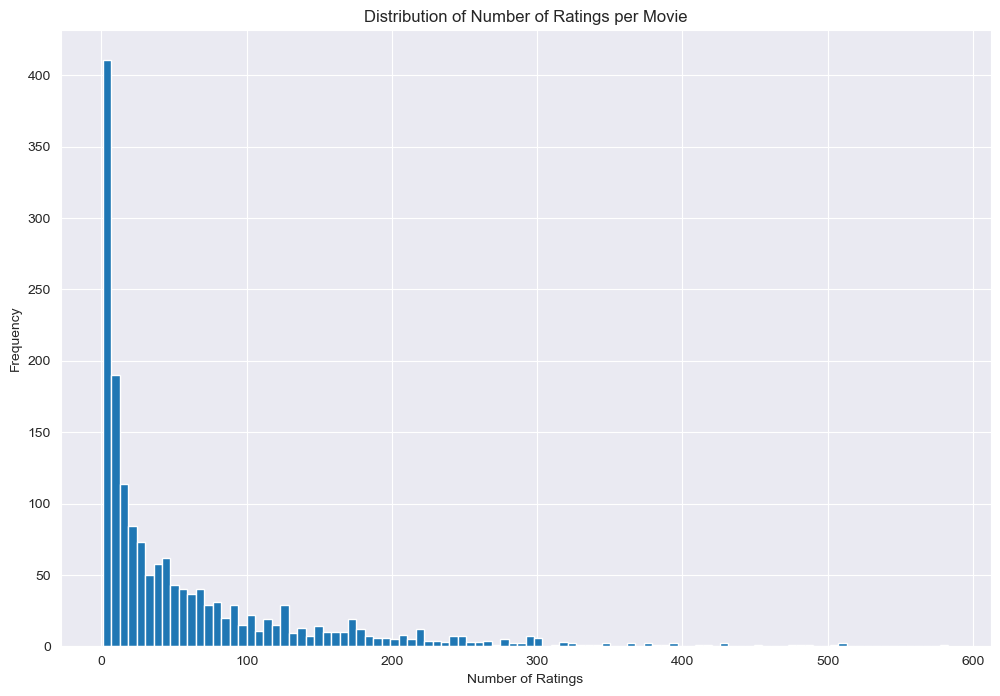

In [95]:
# plot the number of ratings distribution
plt.figure(figsize=(12,8))
plt.hist(movies_rating_df['no_of_ratings'], bins=100,)
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Ratings per Movie')
plt.show()

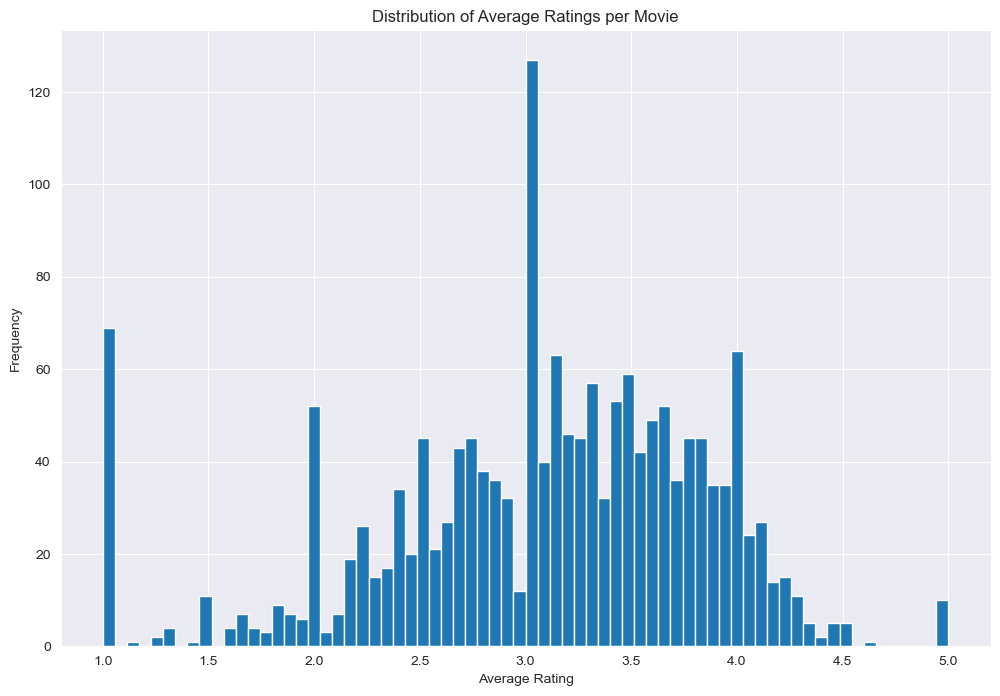

In [96]:
# plot the avg rating distribution
plt.figure(figsize=(12,8))
plt.hist(movies_rating_df['avg_rating'], bins=70,)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings per Movie')
plt.show()

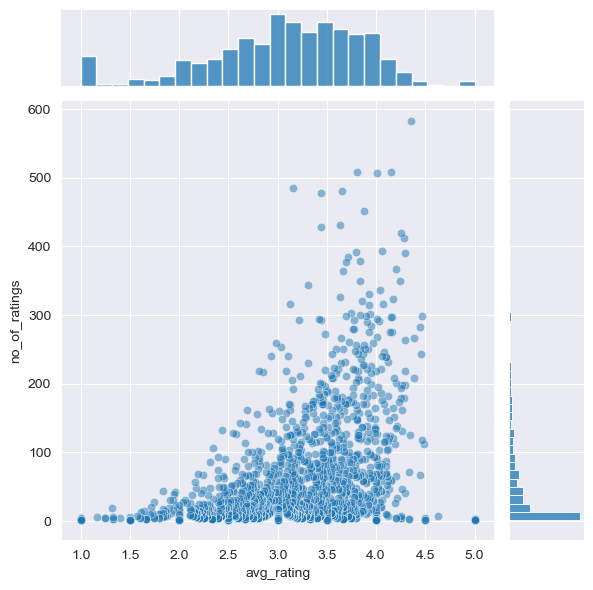

In [99]:
sns.jointplot(x='avg_rating',y='no_of_ratings',data=movies_rating_df,alpha=0.5)
#this shows that there is a positive correlation between average rating and number of ratings

In [108]:
# here we have every user rating for a specific movie, if a user didn't rate it -> nan
moviematrix=merged_df.pivot_table(index="user_id",columns="movie title",values='rating')
print(moviematrix)

movie title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
1                                  NaN           NaN                    2.0   
2                                  NaN           NaN                    NaN   
3                                  NaN           NaN                    NaN   
4                                  NaN           NaN                    NaN   
5                                  NaN           NaN                    2.0   
...                                ...           ...                    ...   
939                                NaN           NaN                    NaN   
940                                NaN           NaN                    NaN   
941                                NaN           NaN                    NaN   
942                                NaN           NaN                    NaN   
943                                NaN           NaN

# Let's experminet on one movie

In [200]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [209]:
similar_to_starwars_df = moviematrix.corrwith(starwars_user_ratings)

similar_to_starwars_df = similar_to_starwars_df.dropna()  # Remove NaN values
similar_to_starwars_df = similar_to_starwars_df.sort_values(ascending=False)

# add title to the df
similar_to_starwars_df = similar_to_starwars_df.reset_index()
similar_to_starwars_df.columns = ['title', 'correlation']

print("Number of movies similar to star wars after removing nan:", similar_to_starwars_df.count())
print("Movies most similar to Star Wars:")
print(similar_to_starwars_df.head(10))
# so if we have someone who likes star wars, we can recommend these movies (the higher the correlation, the better)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Number of movies similar to star wars after removing nan: title          1410
correlation    1410
dtype: int64
Movies most similar to Star Wars:
                                               title  correlation
0                                Commandments (1997)          1.0
1                                        Cosi (1996)          1.0
2                                   No Escape (1994)          1.0
3                                     Stripes (1981)          1.0
4                             Man of the Year (1995)          1.0
5                                 Hollow Reed (1996)          1.0
6                  Beans of Egypt, Maine, The (1994)          1.0
7                       Good Man in Africa, A (1994)          1.0
8  Old Lady Who Walked in the Sea, The (Vieille q...          1.0
9                                 Outlaw, The (1943)          1.0


In [210]:
print(similar_to_starwars_df.columns)


Index(['title', 'correlation'], dtype='object')


In [202]:
# the problem with the above is:
# if 6 people have rated the movie Hollow Reed as 5
# and the same people out of 583 people have rated Star Wars as 5,
# then both of these movies have a correlation of 1.
# But this data is not meaningful as very few people have rated Hollow Reed. 
# To overcome this, we will put a threshold at 100 people 
# so that only the movies that have been watched by more than 100 people are recommended.
# Here, the movie with the title ’Til There was You (1997) cannot be recommended as it has been rated by only 9 people.

In [211]:
movies_rating_df_indexed = movies_rating_df.set_index('movie title')
similar_to_starwars_df = similar_to_starwars_df.set_index('title')

similar_to_starwars_df = similar_to_starwars_df.join(movies_rating_df_indexed['no_of_ratings'])
print(similar_to_starwars_df.head(20))

                                                    correlation  no_of_ratings
title                                                                         
Commandments (1997)                                         1.0              3
Cosi (1996)                                                 1.0              4
No Escape (1994)                                            1.0              5
Stripes (1981)                                              1.0              5
Man of the Year (1995)                                      1.0              9
Hollow Reed (1996)                                          1.0              6
Beans of Egypt, Maine, The (1994)                           1.0              2
Good Man in Africa, A (1994)                                1.0              2
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0              5
Outlaw, The (1943)                                          1.0              2
Line King: Al Hirschfeld, The (1996)                

In [217]:
# now this is more meaningful
# drop the movie we are looking for
# similar_to_starwars_df = similar_to_starwars_df.drop('Star Wars (1977)', axis=0)
similar_to_starwars_df[similar_to_starwars_df['no_of_ratings']>100].sort_values('correlation',ascending=False)

,correlation,no_of_ratings
title,,
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# First method: predicts similar movies based on user ratings

In [218]:
def predict_movies(movie_name, min_ratings=100, exclude_self=True):
    """
    Predict similar movies based on user rating correlations
    
    Args:
        movie_name: Name of the movie to find similar movies for
        min_ratings: Minimum number of ratings required for a movie to be recommended
        exclude_self: Whether to exclude the input movie from recommendations
    """
    try:
        # Get user ratings for the specified movie
        movie_user_ratings = moviematrix[movie_name]
        
        # Calculate correlations with all other movies
        similar_to_movie = moviematrix.corrwith(movie_user_ratings)
        similar_to_movie = similar_to_movie.dropna()  # Remove NaN values

        # Rename columns
        similar_to_movie = similar_to_movie.reset_index()
        similar_to_movie.columns = ['title', 'correlation']

        # Fix: Set the title as index to properly join with movies_rating_df
        # Create a proper indexed version of movies_rating_df for joining
        movies_rating_df_indexed = movies_rating_df.set_index('movie title')
        
        # Set title as index for the correlation data to enable proper joining
        similar_to_movie_indexed = similar_to_movie.set_index('title')
        
        # Join with the rating counts using the title index
        similar_to_movie_with_counts = similar_to_movie_indexed.join(movies_rating_df_indexed['no_of_ratings'])
        
        # Reset index to get title back as a column
        similar_to_movie_with_counts = similar_to_movie_with_counts.reset_index()

        # Filter by minimum ratings and sort by correlation
        result = similar_to_movie_with_counts[similar_to_movie_with_counts['no_of_ratings'] > min_ratings].sort_values('correlation', ascending=False)
        
        # Exclude the input movie itself if requested
        if exclude_self:
            result = result[result['title'] != movie_name]

        return result
    
    except KeyError:
        print(f"Movie '{movie_name}' not found in the dataset.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

In [223]:
predictions = predict_movies("Star Wars (1977)")
print(predictions.head())

#TODO: Fix the above function -> needs to output as above

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


                                                  title  correlation  \
397                     Empire Strikes Back, The (1980)     0.747981   
1051                          Return of the Jedi (1983)     0.672556   
1026                     Raiders of the Lost Ark (1981)     0.536117   
91    Austin Powers: International Man of Mystery (1...     0.377433   
1199                                  Sting, The (1973)     0.367538   

      no_of_ratings  
397             367  
1051            507  
1026            420  
91              130  
1199            241  
